<a href="https://colab.research.google.com/github/Manmeetkaur17/HexSoftwares_TitanicDataset/blob/main/Hex_FirstProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns

In [5]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


Loading the dataset

In [6]:
dataset=sns.load_dataset("titanic")

Understanding the dataset

In [7]:
dataset.shape

(891, 15)

In [8]:
dataset.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
dataset.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [10]:
dataset.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [11]:
dataset.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [13]:
dataset.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


REPERATION (Cleaning the dataset and removing the null values)

In [14]:
dataset['age'].fillna(dataset['age'].mean(), inplace=True)

dataset['embarked'].fillna('Cherbourg')

dataset['embark_town'].fillna('C')

,embark_town
0,Southampton
1,Cherbourg
2,Southampton
3,Southampton
4,Southampton
...,...
886,Southampton
887,Southampton
888,Southampton
889,Cherbourg


In [15]:
dataset.drop(['deck'], axis=1)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [16]:
dataset.reset_index(drop=True, inplace=True)

Feature Understanding

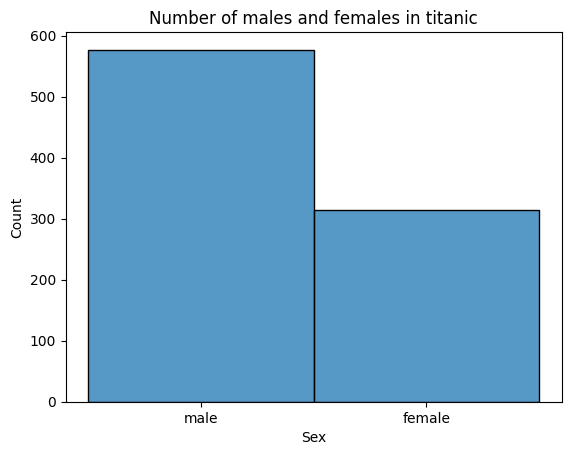

In [17]:
hist=sns.histplot(dataset['sex'])
plt.xlabel("Sex")
plt.ylabel("Count")
hist.set_title("Number of males and females in titanic")
plt.show()


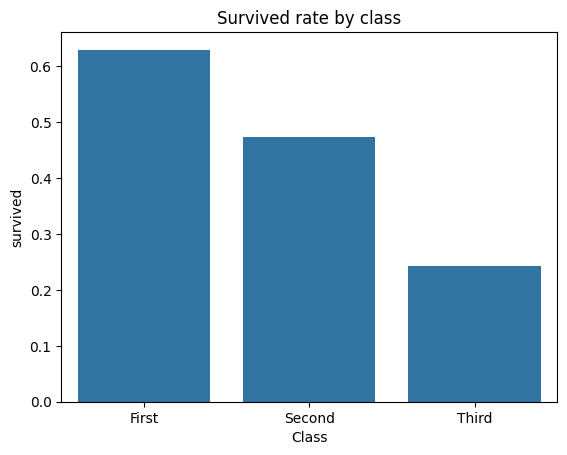

In [18]:
sns.barplot(x='class',y='survived', data=dataset, errorbar=None)
plt.xlabel("Class")
plt.ylabel("survived")
plt.title("Survived rate by class")
plt.show()

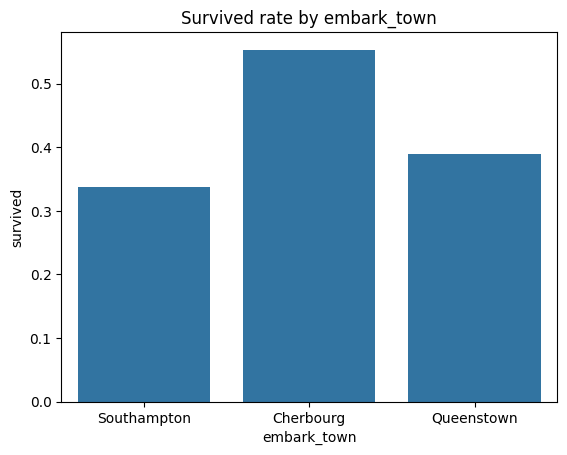

In [19]:
sns.barplot(x='embark_town',y='survived', data=dataset, errorbar=None)
plt.xlabel("embark_town")
plt.ylabel("survived")
plt.title("Survived rate by embark_town")
plt.show()


<ipython-input-20-aa40c8858971>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='survived', data=dataset, ci=None)


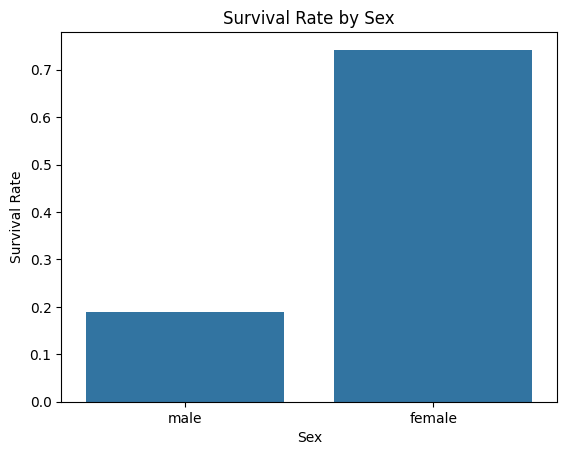

In [20]:
sns.barplot(x='sex', y='survived', data=dataset, ci=None)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

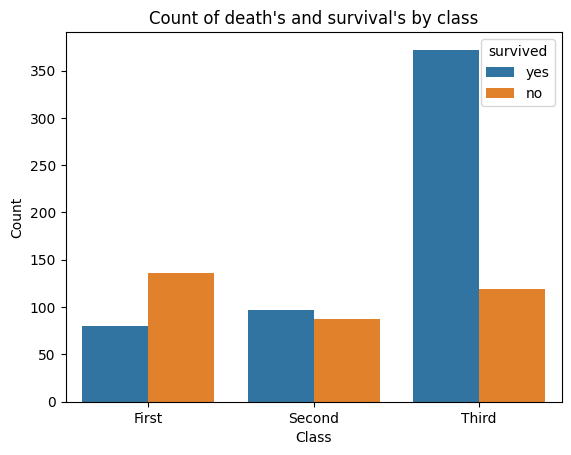

In [49]:
#countplot will count the Number of Death's and Survivor's by class
sns.countplot(x='class', hue='survived', data=dataset)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Count of death's and survival's by class")
plt.legend(title='survived', labels=['yes','no'])
plt.show()

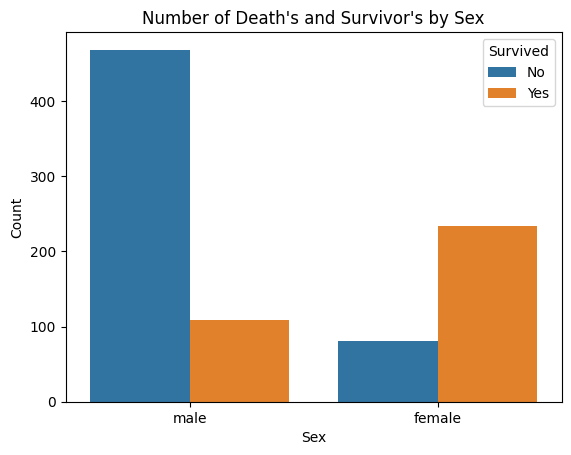

In [27]:
#countplot will count the Number of Death's and Survivor's by Sex
sns.countplot(x='sex', hue='survived', data=dataset)
plt.title("Number of Death's and Survivor's by Sex")
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

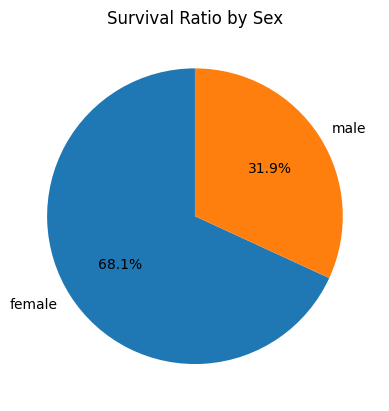

In [48]:
#Pie chart shows the portion of survival ratio of male and females
survived_sex=dataset.groupby('sex')['survived'].sum()
plt.pie(survived_sex, labels=survived_sex.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Ratio by Sex')
plt.show()


<ipython-input-46-2b620a117ddc>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survived_class=dataset.groupby('class')['survived'].sum()


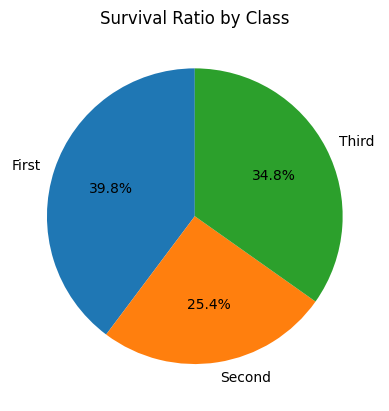

In [46]:
#Pie chart shows the portion of survival by class
survived_class=dataset.groupby('class')['survived'].sum()
plt.pie(survived_class,labels=survived_class.index, autopct='%1.1f%%', startangle=90)
plt.title('Survival Ratio by Class')
plt.show()
